In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
num_size = 400
shape = [num_size, num_size]
intf_lvl = 0 #interference level
sat_lim = 1 #saturation level
g12 = 0.1 # decay_rate
N_patterns = 20 # number of pattern in one sequence
N_trial = 100 # number of trials
dt = 1
f = 0.5
theta = 0#0.5
eta_ = 1
eta = [eta_/N_patterns/(f*(1-f)) if f>0 and f<1 else eta_/N_patterns]#0.2 #learning rate
#eta = 0.8#[eta_/(f*(1-f)) if f>0 and f<1 else eta_]
alpha = 1 #saturation
epochs = 10 #epochs to recall memory
eps = 0 #decay

In [386]:
eps = 0
rds = 100
Acc1 = np.zeros(N_patterns)
Acc2 = np.zeros(N_patterns)
Acc3 = np.zeros(N_patterns)
diag = np.diag_indices(num_size)
for rd in range(rds):
#memory new patterns
    patterns = np.random.randint(0,2, size=[N_patterns, num_size])
    W = np.zeros(shape=shape)
    for n_pat in range(N_patterns):
        pattern = patterns[n_pat].reshape([1, num_size])
        #temp_W = pattern.T.dot(pattern)
        temp_W = (pattern-f).T.dot(pattern-f)
        
        dW = np.zeros(shape=shape)
        dW = eta * temp_W
        dW = (1-alpha*np.abs(W)) * dW
        dW = dW - eps*W
        
        W = W + dW
    W[diag] = 0
    W = np.clip(W, -1, 1) # bounded W
                
# recall memory
    """for epoch in range(epochs):
        r_patterns = np.heaviside(patterns.dot(W), theta)
    
    r_patterns_ = np.heaviside(r_patterns, theta)"""
    for kk in range(N_patterns):
        for epoch in range(epochs):
            pattern = patterns[kk].reshape(1, num_size)
            pattern_ = pattern.dot(W)
            pattern_ = np.heaviside(pattern_, theta)
        if np.abs(pattern_ - pattern).sum()<0.01:
            Acc1[kk] = Acc1[kk] + 1
        Acc2[kk] = Acc2[kk] + 1 - np.abs(pattern_ - pattern).sum()/num_size
        if np.abs(pattern_ - pattern).sum()<= 0.1*num_size:
            Acc3[kk] = Acc3[kk] + 1
                #break #early stop

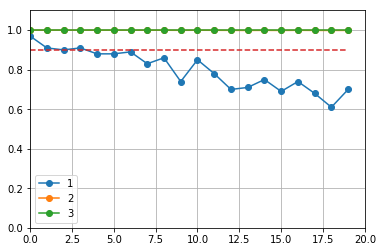

In [387]:
f1 = plt.figure()
plt.plot(Acc1/rds, marker='o', label = '1')
plt.plot(Acc2/rds, marker='o', label = '2')
plt.plot(Acc3/rds, marker='o', label = '3')
plt.xlim([0,N_patterns])
plt.ylim([0,1.1])
plt.grid()
plt.plot(0.9*np.ones(N_patterns),'--')
plt.legend()
plt.show(f1)

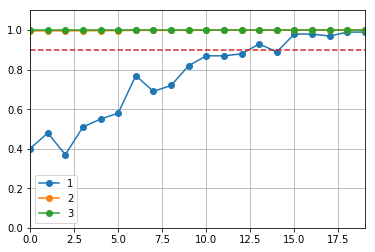

In [395]:
num_size = 400
shape = [num_size, num_size]
N_patterns = 20 # number of pattern in one sequence

eps = 0.02
rds = 100
Acc1 = np.zeros(N_patterns)
Acc2 = np.zeros(N_patterns)
Acc3 = np.zeros(N_patterns)
diag = np.diag_indices(num_size)
for rd in range(rds):
#memory new patterns
    patterns = np.random.randint(0,2, size=[N_patterns, num_size])
    W = np.zeros(shape=shape)
    for n_pat in range(N_patterns):
        pattern = patterns[n_pat].reshape([1, num_size])
        #temp_W = pattern.T.dot(pattern)
        temp_W = (pattern-f).T.dot(pattern-f)
        
        dW = np.zeros(shape=shape)
        dW = eta * temp_W
        #dW = (1-alpha*np.abs(W)) * dW
        dW = dW - eps*W
        
        W = W + dW
    W[diag] = 0
    W = np.clip(W, -1, 1) # bounded W
                
# recall memory
    """for epoch in range(epochs):
        r_patterns = np.heaviside(patterns.dot(W), theta)
    
    r_patterns_ = np.heaviside(r_patterns, theta)"""
    for kk in range(N_patterns):
        for epoch in range(epochs):
            pattern = patterns[kk].reshape(1, num_size)
            pattern_ = pattern.dot(W)
            pattern_ = np.heaviside(pattern_, theta)
        if np.abs(pattern_ - pattern).sum()<0.01:
            Acc1[kk] = Acc1[kk] + 1
        Acc2[kk] = Acc2[kk] + 1 - np.abs(pattern_ - pattern).sum()/num_size
        if np.abs(pattern_ - pattern).sum()<= 0.1*num_size:
            Acc3[kk] = Acc3[kk] + 1
                #break #early stop
f1 = plt.figure()
plt.plot(Acc1/rds, marker='o', label='1')
plt.plot(Acc2/rds, marker='o', label='2')
plt.plot(Acc3/rds, marker='o', label='3')
plt.xlim([0,N_patterns-1])
plt.ylim([0,1.1])
plt.grid()
plt.plot(0.9*np.ones(N_patterns),'--')
plt.legend()
plt.show(f1)

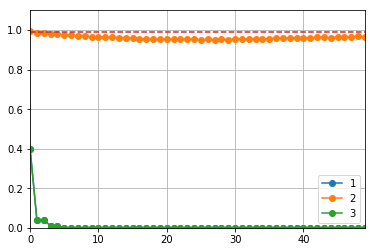

In [3]:
eps = 0.01
alpha = 0.9
eta = 0.9
N_patterns = 50


rds = 100
Acc1 = np.zeros(N_patterns)
Acc2 = np.zeros(N_patterns)
Acc3 = np.zeros(N_patterns)
diag = np.diag_indices(num_size)
for rd in range(rds):
#memory new patterns
    patterns = np.random.randint(0,2, size=[N_patterns, num_size])
    W = np.zeros(shape=shape)
    for n_pat in range(N_patterns):
        pattern = patterns[n_pat].reshape([1, num_size])
        #temp_W = pattern.T.dot(pattern)
        temp_W = (pattern-f).T.dot(pattern-f)
        
        dW = np.zeros(shape=shape)
        dW = eta * temp_W
        dW = (1-alpha*np.abs(W)) * dW
        dW = dW - eps*W
        
        W = W + dW
    W[diag] = 0
    W = np.clip(W, -1, 1) # bounded W
                
# recall memory
    for kk in range(N_patterns):
        for epoch in range(epochs):
            pattern = patterns[kk].reshape(1, num_size)
            pattern_ = pattern.dot(W)
            pattern_ = np.heaviside(pattern_, theta)
        if np.abs(pattern_ - pattern).sum()<0.01:
            Acc1[kk] = Acc1[kk] + 1
        Acc2[kk] = Acc2[kk] + 1 - np.abs(pattern_ - pattern).sum()/num_size
        if np.abs(pattern_ - pattern).sum()<= 0.04:
            Acc3[kk] = Acc3[kk] + 1
                #break #early stop
f1 = plt.figure()
plt.plot(Acc1/rds, marker='o', label='1')
plt.plot(Acc2/rds, marker='o', label='2')
plt.plot(Acc3/rds, marker='o', label='3')
plt.xlim([0,N_patterns-1])
plt.ylim([0,1.1])
plt.grid()
plt.plot(0.99*np.ones(N_patterns),'--')
plt.legend()
plt.show(f1)

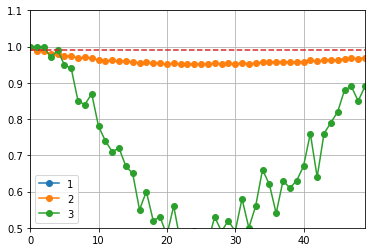

In [438]:
eps = 0.01
alpha = 0.9
eta = 0.9
N_patterns = 50
tolerence = 18

rds = 100
Acc1 = np.zeros(N_patterns)
Acc2 = np.zeros(N_patterns)
Acc3 = np.zeros(N_patterns)
diag = np.diag_indices(num_size)
for rd in range(rds):
#memory new patterns
    patterns = np.random.randint(0,2, size=[N_patterns, num_size])
    W = np.zeros(shape=shape)
    for n_pat in range(N_patterns):
        pattern = patterns[n_pat].reshape([1, num_size])
        #temp_W = pattern.T.dot(pattern)
        temp_W = (pattern-f).T.dot(pattern-f)
        
        dW = np.zeros(shape=shape)
        dW = eta * temp_W
        dW = (1-alpha*np.abs(W)) * dW
        dW = dW - eps*W
        
        W = W + dW
    W[diag] = 0
    W = np.clip(W, -1, 1) # bounded W
                
# recall memory
    for kk in range(N_patterns):
        for epoch in range(epochs):
            pattern = patterns[kk].reshape(1, num_size)
            pattern_ = pattern.dot(W)
            pattern_ = np.heaviside(pattern_, theta)
        if np.abs(pattern_ - pattern).sum()<0.01:
            Acc1[kk] = Acc1[kk] + 1
        Acc2[kk] = Acc2[kk] + 1 - np.abs(pattern_ - pattern).sum()/num_size
        if np.abs(pattern_ - pattern).sum()<= tolerence:
            Acc3[kk] = Acc3[kk] + 1
                #break #early stop

f1 = plt.figure()
plt.plot(Acc1/rds, marker='o', label='1')
plt.plot(Acc2/rds, marker='o', label='2')
plt.plot(Acc3/rds, marker='o', label='3')
plt.xlim([0,N_patterns-1])
plt.ylim([0.5,1.1])
plt.grid()
plt.plot(0.99*np.ones(N_patterns),'--')
plt.legend()
plt.show(f1)

In [441]:
count = 0
for ii in range(N_patterns):
    if Acc3[ii]/rds>0.99:
        count = count +1
print(count)

3


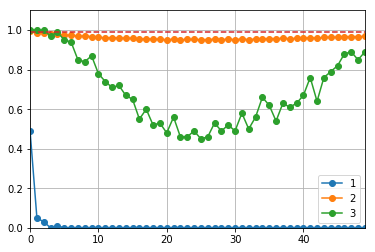

In [440]:
f1 = plt.figure()
plt.plot(Acc1/rds, marker='o', label='1')
plt.plot(Acc2/rds, marker='o', label='2')
plt.plot(Acc3/rds, marker='o', label='3')
plt.xlim([0,N_patterns-1])
plt.ylim([0,1.1])
plt.grid()
plt.plot(0.99*np.ones(N_patterns),'--')
plt.legend()
plt.show(f1)